## Q1 ensembleLearning using pipeline

In [1]:
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the datasets
datasets = {'breast_cancer': load_breast_cancer(), 'wine': load_wine(), 'digits': load_digits(), 'iris': load_iris()}

# Define different sets of hyperparameters
hyperparameters = [{'n_estimators': 10, 'max_depth': 5},
                   {'n_estimators': 50, 'max_depth': 10},
                   {'n_estimators': 100, 'max_depth': 15},
                   {'n_estimators': 200, 'max_depth': 20}]

# Define different test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Define data preprocessing methods
preprocessing_methods = [('standard', StandardScaler())]

# Define the pipeline
pipe = Pipeline(steps=[('preprocessing', None), ('classifier', None)])

# Loop over the datasets
for dataset_name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    print(f"Dataset: {dataset_name}")
    
    # Loop over the preprocessing methods
    for preprocessing_name, preprocessing_method in preprocessing_methods:
        # Set the preprocessing method in the pipeline
        pipe.set_params(preprocessing=preprocessing_method)

        # Loop over the hyperparameters
        for params in hyperparameters:
            print(f"Preprocessing: {preprocessing_name}, Hyperparameters: {params}")
            
            # Loop over the test sizes
            for test_size in test_sizes:
                # Split the data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=89)

                # Set the classifier in the pipeline
                pipe.set_params(classifier=RandomForestClassifier(**params, random_state=42))

                # Fit the pipeline to the training data
                pipe.fit(X_train, y_train)

                # Predict the labels of the test data
                y_pred = pipe.predict(X_test)

                # Calculate the accuracy of the classifier on the test data
                accuracy = accuracy_score(y_test, y_pred)

                print(f"Test size: {test_size}, Accuracy: {accuracy:.2f}")

            print()
        print()


Dataset: breast_cancer
Preprocessing: standard, Hyperparameters: {'n_estimators': 10, 'max_depth': 5}
Test size: 0.1, Accuracy: 0.93
Test size: 0.2, Accuracy: 0.96
Test size: 0.3, Accuracy: 0.95
Test size: 0.4, Accuracy: 0.96

Preprocessing: standard, Hyperparameters: {'n_estimators': 50, 'max_depth': 10}
Test size: 0.1, Accuracy: 0.95
Test size: 0.2, Accuracy: 0.96
Test size: 0.3, Accuracy: 0.95
Test size: 0.4, Accuracy: 0.97

Preprocessing: standard, Hyperparameters: {'n_estimators': 100, 'max_depth': 15}
Test size: 0.1, Accuracy: 0.95
Test size: 0.2, Accuracy: 0.96
Test size: 0.3, Accuracy: 0.95
Test size: 0.4, Accuracy: 0.96

Preprocessing: standard, Hyperparameters: {'n_estimators': 200, 'max_depth': 20}
Test size: 0.1, Accuracy: 0.95
Test size: 0.2, Accuracy: 0.96
Test size: 0.3, Accuracy: 0.95
Test size: 0.4, Accuracy: 0.96


Dataset: wine
Preprocessing: standard, Hyperparameters: {'n_estimators': 10, 'max_depth': 5}
Test size: 0.1, Accuracy: 1.00
Test size: 0.2, Accuracy: 0.97


#### Q2 Dimesnionality Reduction on at least 4 datasets using at least 6 techniques

In [7]:
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, load_iris
from sklearn.decomposition import PCA, FastICA, TruncatedSVD, FactorAnalysis
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Define the datasets
datasets = {'breast_cancer': load_breast_cancer(), 'wine': load_wine(), 'digits': load_digits(), 'iris': load_iris()}

# Define the dimensionality reduction techniques to use
dim_reduction_methods = [
    PCA(n_components=2),
    FastICA(n_components=2),
    TruncatedSVD(n_components=2),
    FactorAnalysis(n_components=2),
    #LinearDiscriminantAnalysis(n_components=2),
    LocallyLinearEmbedding(n_components=2),
    NeighborhoodComponentsAnalysis(n_components=2)
]

# Loop over the datasets
for dataset_name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    print(f"Dataset: {dataset_name}")
    
    # Loop over the dimensionality reduction methods
    for dim_reduction in dim_reduction_methods:
        # Apply dimensionality reduction to the data
        X_reduced = dim_reduction.fit_transform(X, y)
        
        # Print the shape of the reduced data
        print(f"{type(dim_reduction).__name__} - Reduced shape: {X_reduced.shape}")
        
    print()

Dataset: breast_cancer
PCA - Reduced shape: (569, 2)
FastICA - Reduced shape: (569, 2)
TruncatedSVD - Reduced shape: (569, 2)
FactorAnalysis - Reduced shape: (569, 2)
LocallyLinearEmbedding - Reduced shape: (569, 2)
NeighborhoodComponentsAnalysis - Reduced shape: (569, 2)

Dataset: wine
PCA - Reduced shape: (178, 2)
FastICA - Reduced shape: (178, 2)
TruncatedSVD - Reduced shape: (178, 2)
FactorAnalysis - Reduced shape: (178, 2)
LocallyLinearEmbedding - Reduced shape: (178, 2)
NeighborhoodComponentsAnalysis - Reduced shape: (178, 2)

Dataset: digits
PCA - Reduced shape: (1797, 2)
FastICA - Reduced shape: (1797, 2)
TruncatedSVD - Reduced shape: (1797, 2)
FactorAnalysis - Reduced shape: (1797, 2)
LocallyLinearEmbedding - Reduced shape: (1797, 2)
NeighborhoodComponentsAnalysis - Reduced shape: (1797, 2)

Dataset: iris
PCA - Reduced shape: (150, 2)
FastICA - Reduced shape: (150, 2)
TruncatedSVD - Reduced shape: (150, 2)
FactorAnalysis - Reduced shape: (150, 2)
LocallyLinearEmbedding - Reduc

In [20]:
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, load_iris
from sklearn.decomposition import PCA, FastICA, TruncatedSVD, FactorAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the datasets
datasets = {'breast_cancer': load_breast_cancer(), 'wine': load_wine(), 'digits': load_digits(), 'iris': load_iris()}

# Define the dimensionality reduction techniques to use
dim_reduction_methods = [
    PCA(n_components=2),
    FastICA(n_components=2),
    TruncatedSVD(n_components=2),
    FactorAnalysis(n_components=2),
    LocallyLinearEmbedding(n_components=2),
    NeighborhoodComponentsAnalysis(n_components=2)
]

# Define the classifier to use
classifier = KNeighborsClassifier(n_neighbors=5)

# Define the test sizes to use
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Loop over the datasets
for dataset_name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    print(f"Dataset: {dataset_name}")
    
    # Loop over the test sizes
    for test_size in test_sizes:
        # Loop over the dimensionality reduction methods
        for dim_reduction in dim_reduction_methods:
            # Define the pipeline to use
            pipeline = make_pipeline(dim_reduction, classifier)
            
            # Compute the cross-validation score
            scores = cross_val_score(pipeline, X, y, cv=5)
            mean_score = np.mean(scores)
            
            # Print the results
            print(f"Test size: {test_size:.1f}, {type(dim_reduction).__name__} - Mean CV score: {mean_score:.3f}\n")
        
    print()


Dataset: breast_cancer
Test size: 0.1, PCA - Mean CV score: 0.923

Test size: 0.1, FastICA - Mean CV score: 0.921

Test size: 0.1, TruncatedSVD - Mean CV score: 0.923

Test size: 0.1, FactorAnalysis - Mean CV score: 0.919

Test size: 0.1, LocallyLinearEmbedding - Mean CV score: 0.886

Test size: 0.1, NeighborhoodComponentsAnalysis - Mean CV score: 0.919

Test size: 0.2, PCA - Mean CV score: 0.923

Test size: 0.2, FastICA - Mean CV score: 0.921

Test size: 0.2, TruncatedSVD - Mean CV score: 0.923

Test size: 0.2, FactorAnalysis - Mean CV score: 0.919

Test size: 0.2, LocallyLinearEmbedding - Mean CV score: 0.891

Test size: 0.2, NeighborhoodComponentsAnalysis - Mean CV score: 0.919

Test size: 0.3, PCA - Mean CV score: 0.923

Test size: 0.3, FastICA - Mean CV score: 0.921

Test size: 0.3, TruncatedSVD - Mean CV score: 0.923

Test size: 0.3, FactorAnalysis - Mean CV score: 0.919

Test size: 0.3, LocallyLinearEmbedding - Mean CV score: 0.881

Test size: 0.3, NeighborhoodComponentsAnalysis

#### Q3 Clustering models on at least 4 datasets (using K-means, K-median, K-means++ & Hierarchical)

Dataset: Breast Cancer
Test size: 0.1
K-Medoids - Train Silhouette score: 0.523


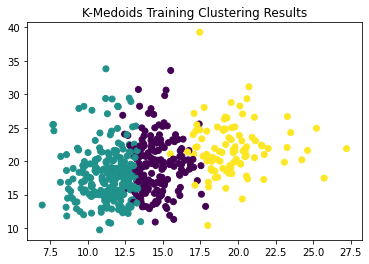

K-Medoids - Test Silhouette score: 0.599


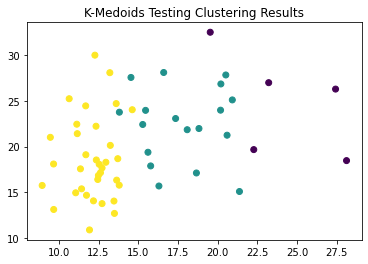

K-Means++ - Train Silhouette score: 0.637


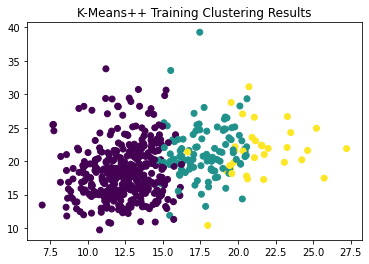

K-Means++ - Test Silhouette score: 0.660


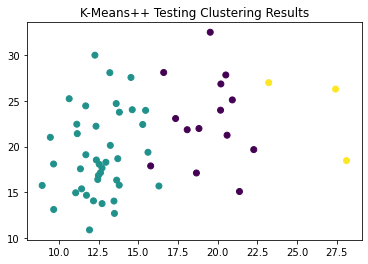

Hierarchical - Train Silhouette score: 0.670


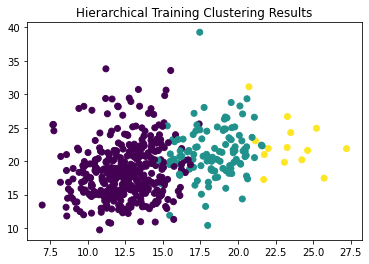

Hierarchical - Test Silhouette score: 0.599


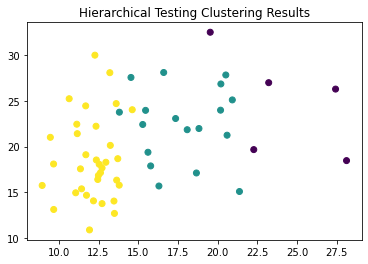

Test size: 0.2
K-Medoids - Train Silhouette score: 0.658


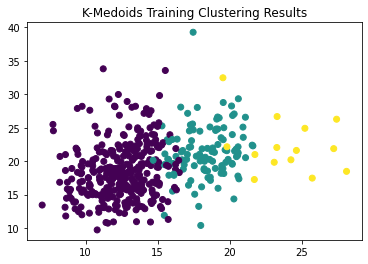

K-Medoids - Test Silhouette score: 0.647


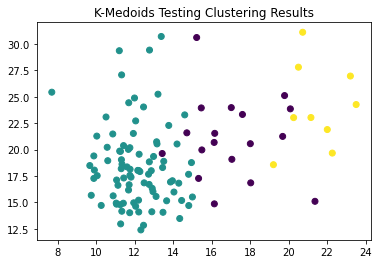

K-Means++ - Train Silhouette score: 0.663


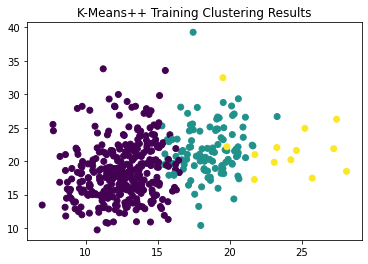

K-Means++ - Test Silhouette score: 0.726


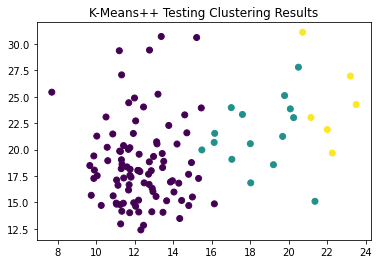

Hierarchical - Train Silhouette score: 0.521


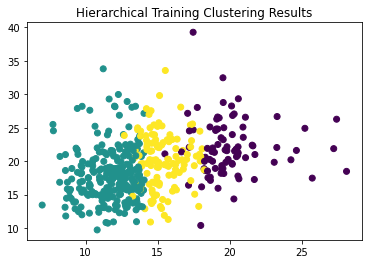

Hierarchical - Test Silhouette score: 0.718


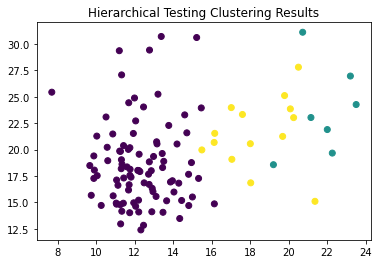

Test size: 0.3
K-Medoids - Train Silhouette score: 0.657


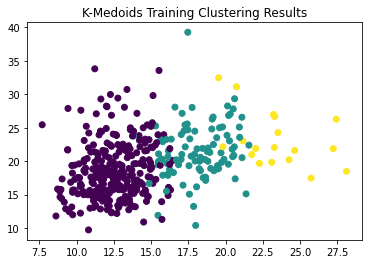

K-Medoids - Test Silhouette score: 0.528


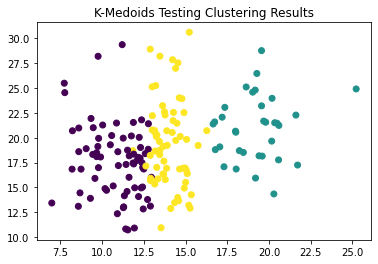

K-Means++ - Train Silhouette score: 0.660


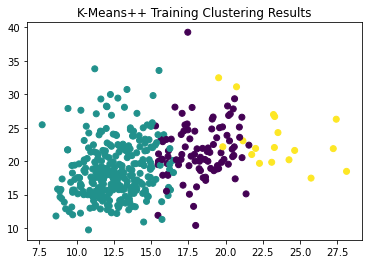

K-Means++ - Test Silhouette score: 0.532


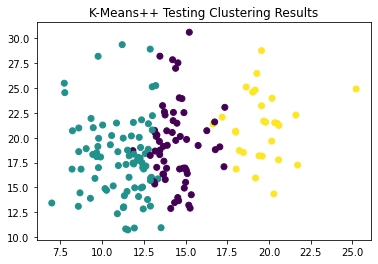

Hierarchical - Train Silhouette score: 0.675


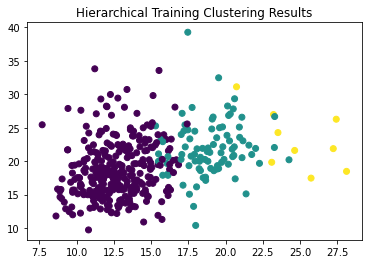

Hierarchical - Test Silhouette score: 0.517


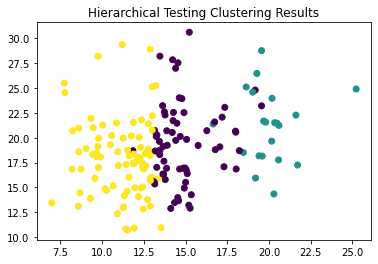

Test size: 0.4
K-Medoids - Train Silhouette score: 0.526


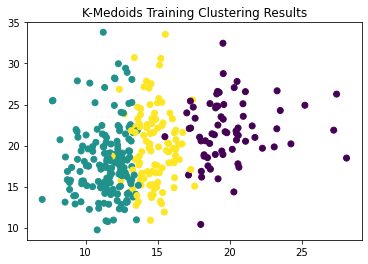

K-Medoids - Test Silhouette score: 0.682


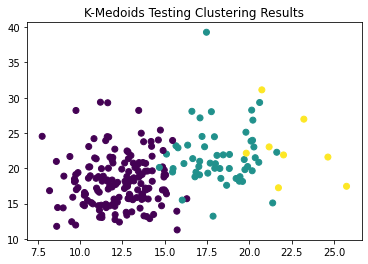

K-Means++ - Train Silhouette score: 0.666


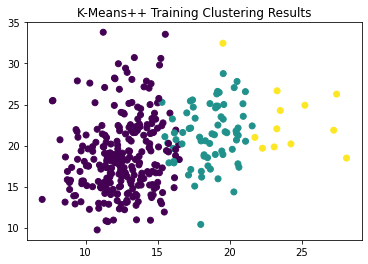

K-Means++ - Test Silhouette score: 0.675


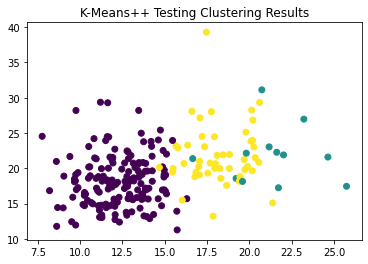

Hierarchical - Train Silhouette score: 0.684


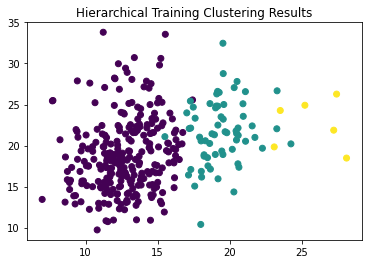

Hierarchical - Test Silhouette score: 0.689


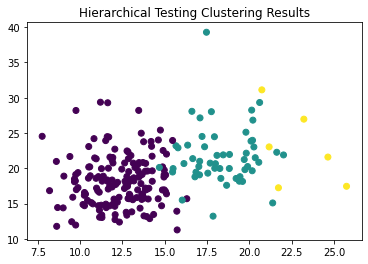


Dataset: Wine
Test size: 0.1
K-Medoids - Train Silhouette score: 0.561


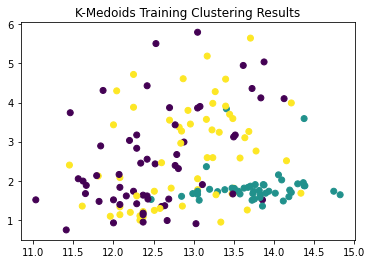

K-Medoids - Test Silhouette score: 0.570


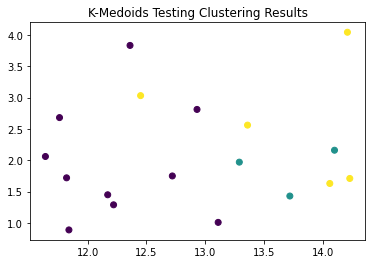

K-Means++ - Train Silhouette score: 0.571


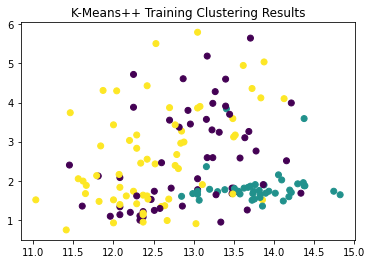

K-Means++ - Test Silhouette score: 0.547


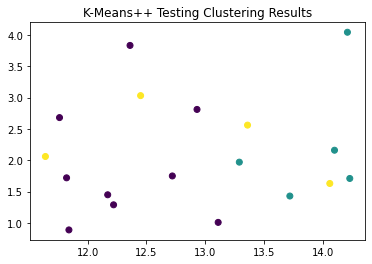

Hierarchical - Train Silhouette score: 0.568


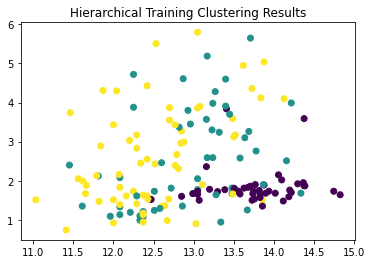

Hierarchical - Test Silhouette score: 0.570


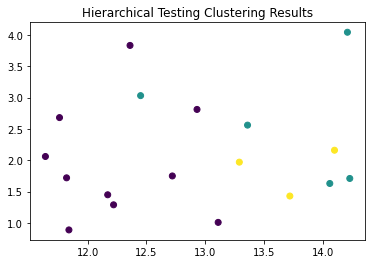

Test size: 0.2
K-Medoids - Train Silhouette score: 0.569


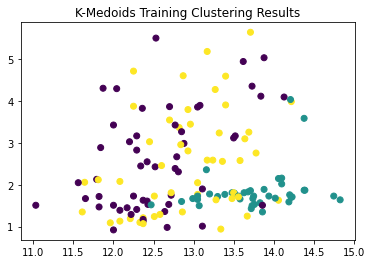

K-Medoids - Test Silhouette score: 0.560


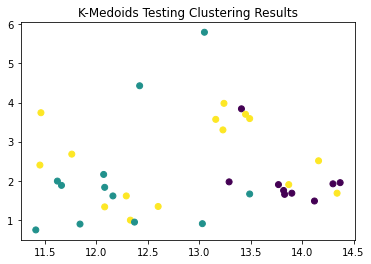

K-Means++ - Train Silhouette score: 0.571


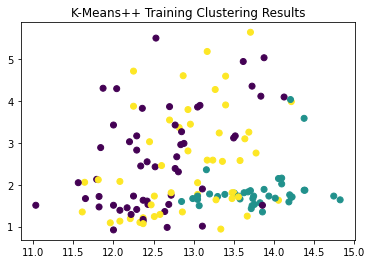

K-Means++ - Test Silhouette score: 0.549


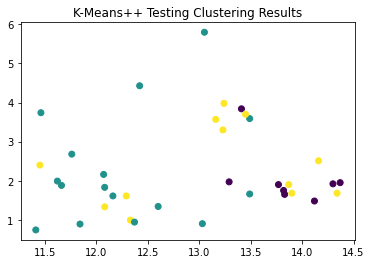

Hierarchical - Train Silhouette score: 0.567


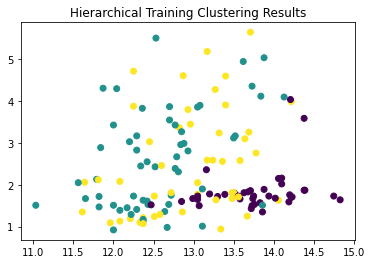

Hierarchical - Test Silhouette score: 0.622


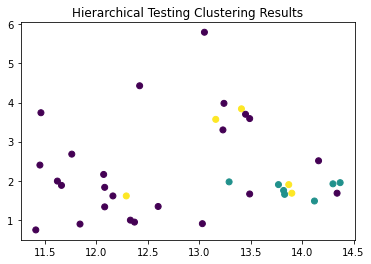

Test size: 0.3
K-Medoids - Train Silhouette score: 0.609


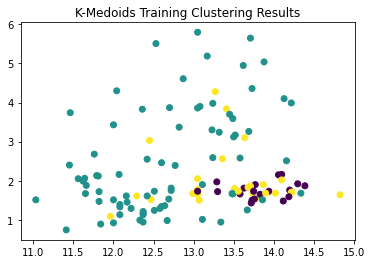

K-Medoids - Test Silhouette score: 0.553


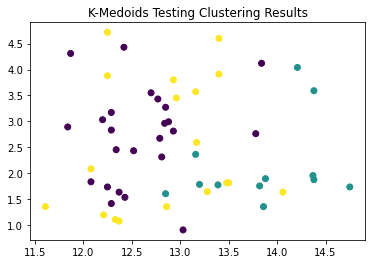

K-Means++ - Train Silhouette score: 0.572


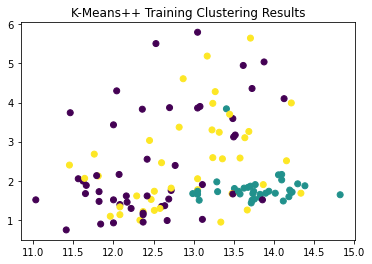

K-Means++ - Test Silhouette score: 0.569


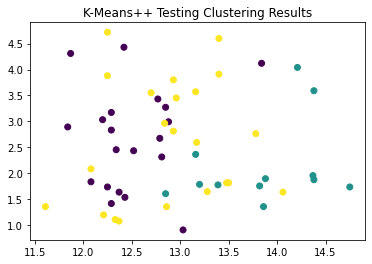

Hierarchical - Train Silhouette score: 0.572


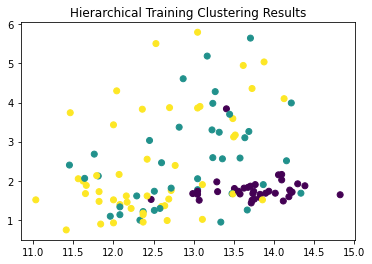

Hierarchical - Test Silhouette score: 0.547


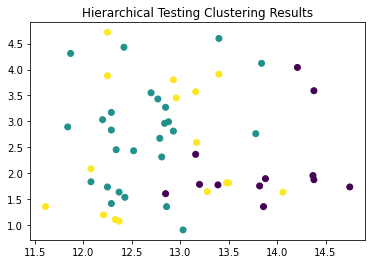

Test size: 0.4
K-Medoids - Train Silhouette score: 0.595


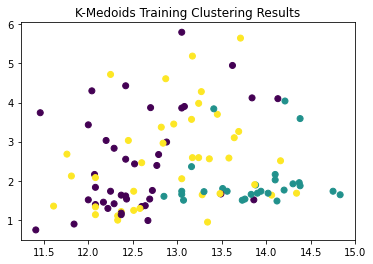

K-Medoids - Test Silhouette score: 0.521


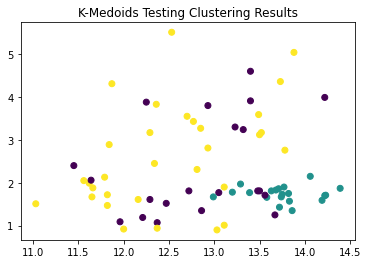

K-Means++ - Train Silhouette score: 0.595


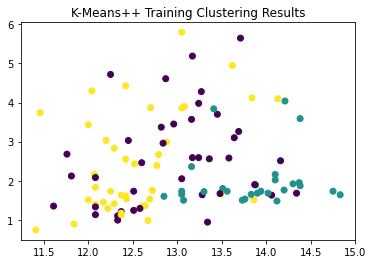

K-Means++ - Test Silhouette score: 0.604


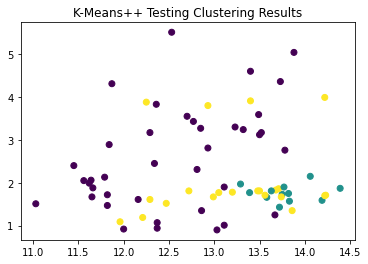

Hierarchical - Train Silhouette score: 0.558


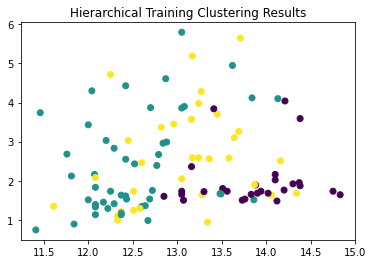

Hierarchical - Test Silhouette score: 0.565


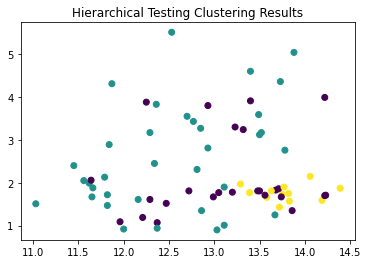


Dataset: Digits
Test size: 0.1
K-Medoids - Train Silhouette score: 0.105


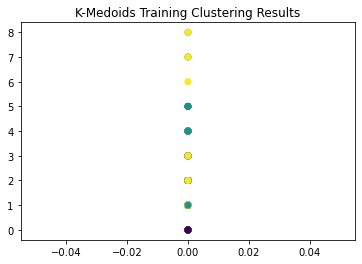

K-Medoids - Test Silhouette score: 0.099


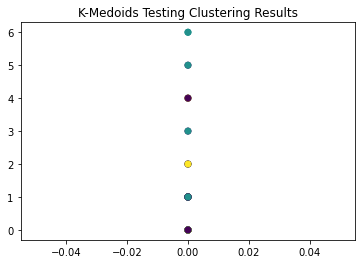

K-Means++ - Train Silhouette score: 0.127


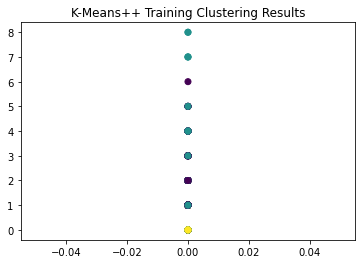

K-Means++ - Test Silhouette score: 0.135


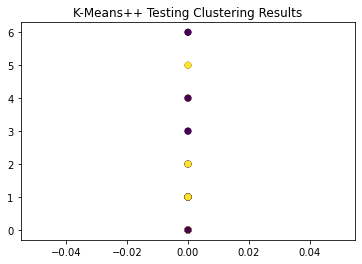

Hierarchical - Train Silhouette score: 0.111


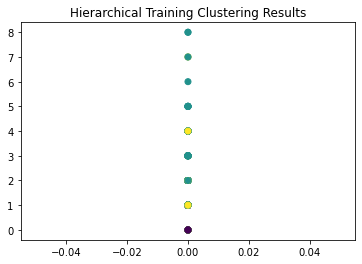

Hierarchical - Test Silhouette score: 0.109


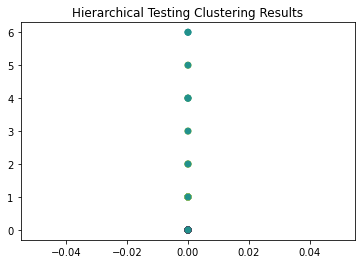

Test size: 0.2
K-Medoids - Train Silhouette score: 0.098


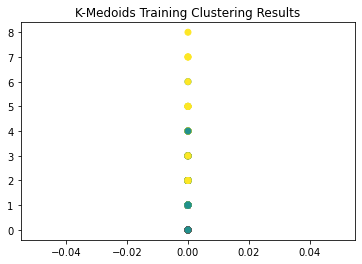

K-Medoids - Test Silhouette score: 0.095


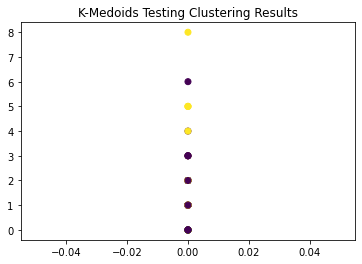

K-Means++ - Train Silhouette score: 0.128


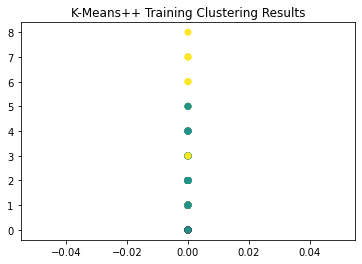

K-Means++ - Test Silhouette score: 0.123


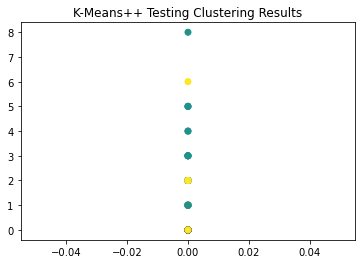

Hierarchical - Train Silhouette score: 0.096


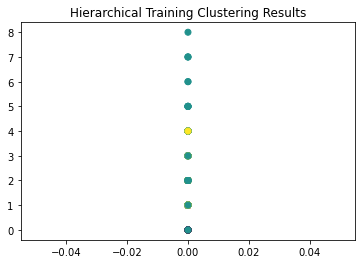

Hierarchical - Test Silhouette score: 0.110


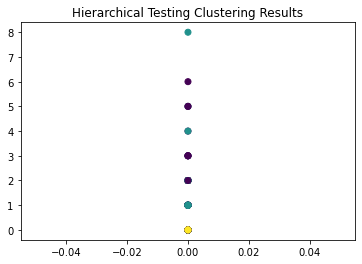

Test size: 0.3
K-Medoids - Train Silhouette score: 0.094


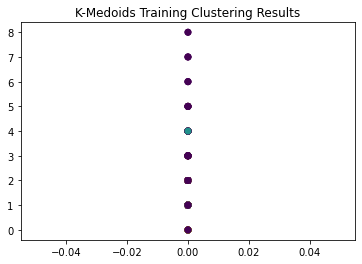

K-Medoids - Test Silhouette score: 0.093


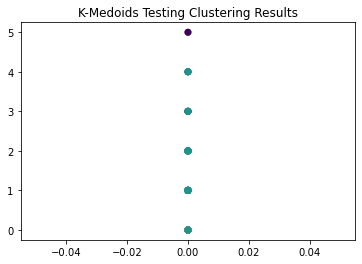

K-Means++ - Train Silhouette score: 0.125


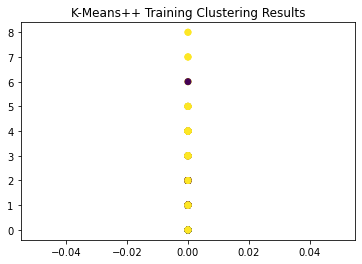

K-Means++ - Test Silhouette score: 0.128


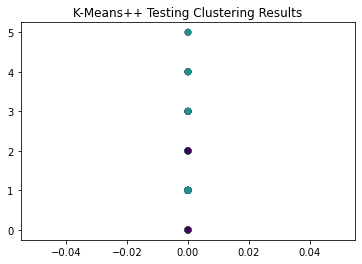

Hierarchical - Train Silhouette score: 0.107


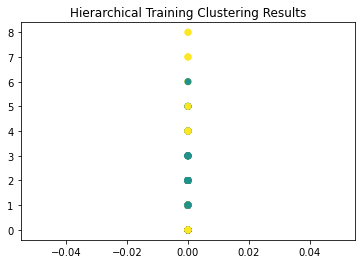

Hierarchical - Test Silhouette score: 0.107


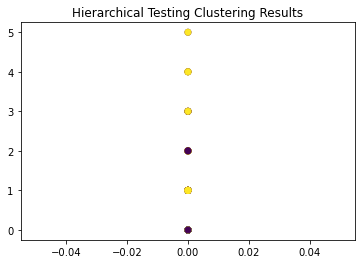

Test size: 0.4
K-Medoids - Train Silhouette score: 0.107


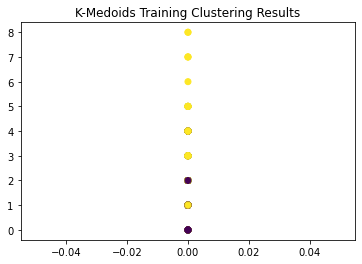

K-Medoids - Test Silhouette score: 0.084


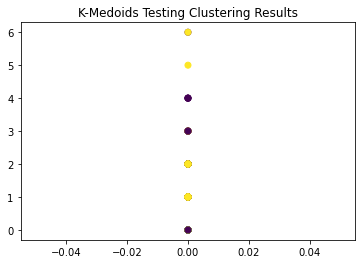

K-Means++ - Train Silhouette score: 0.125


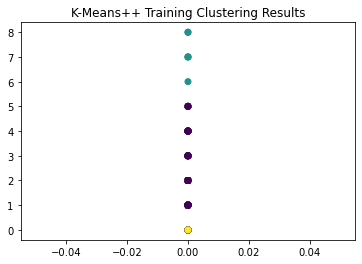

K-Means++ - Test Silhouette score: 0.131


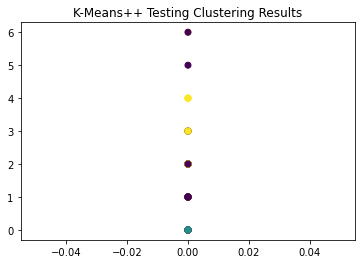

Hierarchical - Train Silhouette score: 0.105


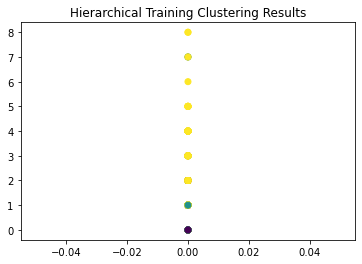

Hierarchical - Test Silhouette score: 0.108


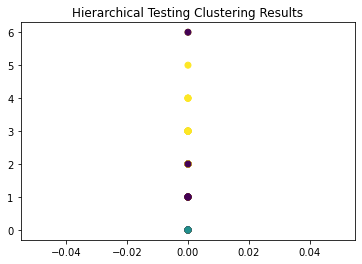


Dataset: Iris
Test size: 0.1
K-Medoids - Train Silhouette score: 0.555


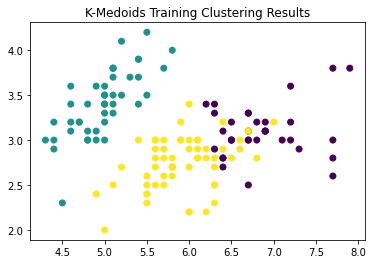

K-Medoids - Test Silhouette score: 0.477


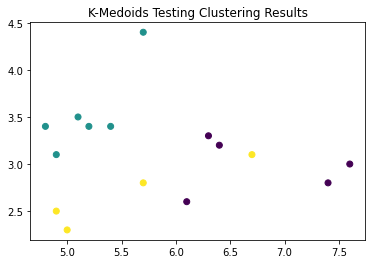

K-Means++ - Train Silhouette score: 0.555


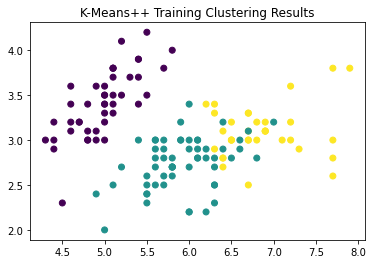

K-Means++ - Test Silhouette score: 0.527


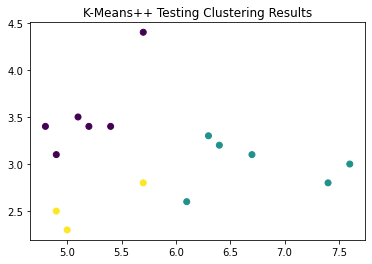

Hierarchical - Train Silhouette score: 0.556


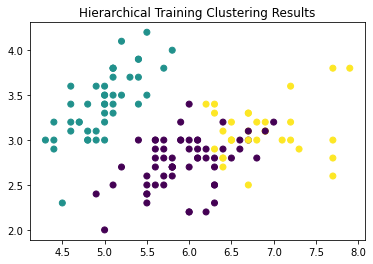

Hierarchical - Test Silhouette score: 0.527


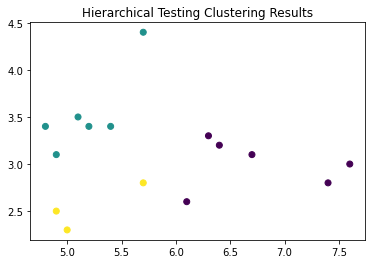

Test size: 0.2
K-Medoids - Train Silhouette score: 0.539


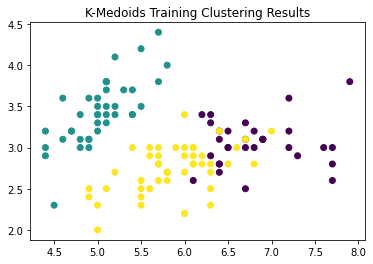

K-Medoids - Test Silhouette score: 0.607


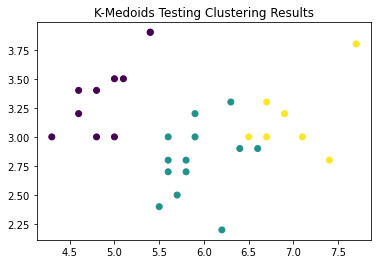

K-Means++ - Train Silhouette score: 0.538


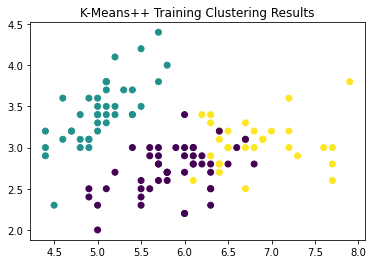

K-Means++ - Test Silhouette score: 0.607


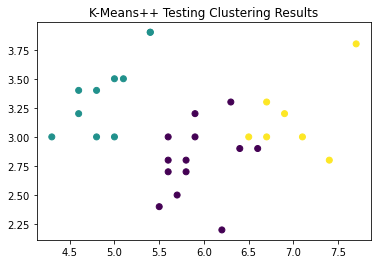

Hierarchical - Train Silhouette score: 0.531


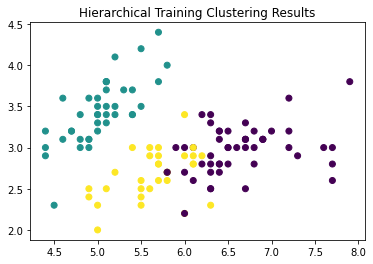

Hierarchical - Test Silhouette score: 0.607


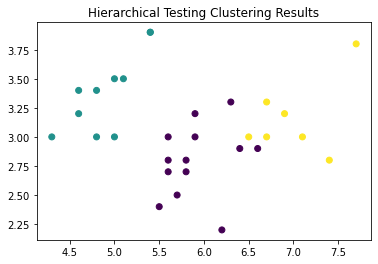

Test size: 0.3
K-Medoids - Train Silhouette score: 0.530


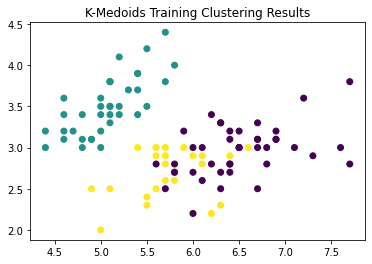

K-Medoids - Test Silhouette score: 0.553


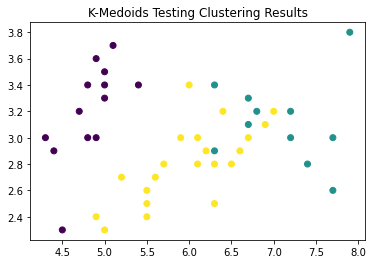

K-Means++ - Train Silhouette score: 0.557


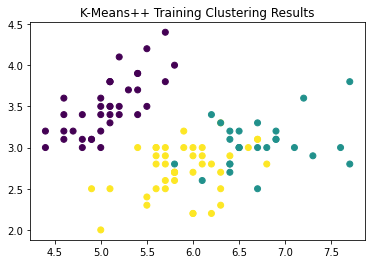

K-Means++ - Test Silhouette score: 0.529


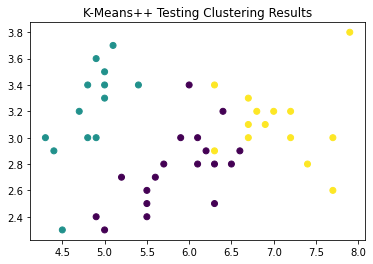

Hierarchical - Train Silhouette score: 0.559


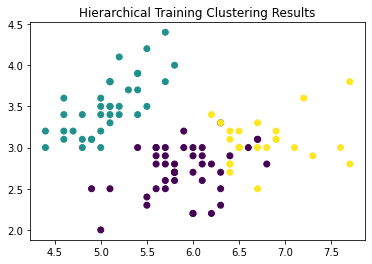

Hierarchical - Test Silhouette score: 0.551


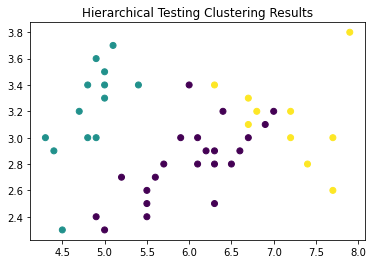

Test size: 0.4
K-Medoids - Train Silhouette score: 0.485


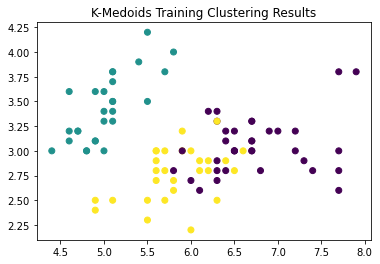

K-Medoids - Test Silhouette score: 0.578


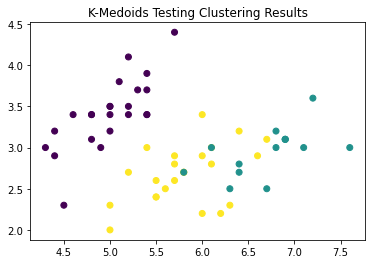

K-Means++ - Train Silhouette score: 0.530


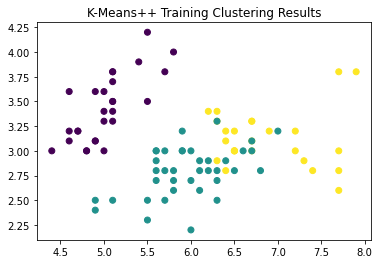

K-Means++ - Test Silhouette score: 0.578


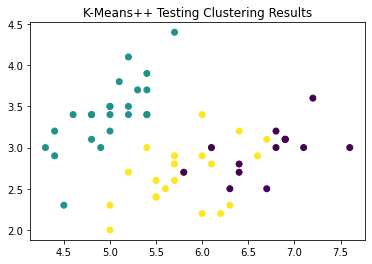

Hierarchical - Train Silhouette score: 0.486


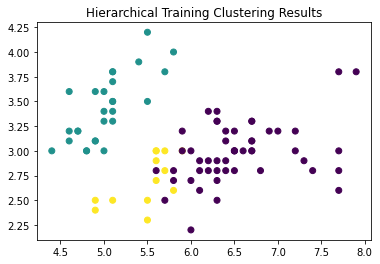

Hierarchical - Test Silhouette score: 0.586


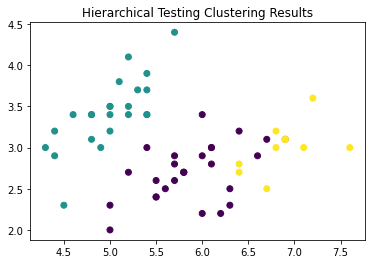

In [21]:
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the datasets
datasets = [load_breast_cancer(), load_wine(), load_digits(), load_iris()]

# Define clustering algorithms
algorithms = [KMedoids(n_clusters=3, init='k-medoids++'), KMeans(n_clusters=3, init='k-means++'), AgglomerativeClustering(n_clusters=3)]

# Define test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Loop over the datasets and algorithms
for dataset, dataset_name in zip(datasets, ['Breast Cancer', 'Wine', 'Digits', 'Iris']):
    X = dataset.data
    y = dataset.target
    print(f"Dataset: {dataset_name}")
    
    # Loop over the test sizes
    for test_size in test_sizes:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        print(f"Test size: {test_size}")
        
        for algorithm, algorithm_name in zip(algorithms, ['K-Medoids', 'K-Means++', 'Hierarchical']):
            y_pred = algorithm.fit_predict(X_train)
            sil_score = silhouette_score(X_train, y_pred)
            print(f"{algorithm_name} - Train Silhouette score: {sil_score:.3f}")
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
            plt.title(f"{algorithm_name} Training Clustering Results")
            plt.show()
            
            y_pred = algorithm.fit_predict(X_test)
            sil_score = silhouette_score(X_test, y_pred)
            print(f"{algorithm_name} - Test Silhouette score: {sil_score:.3f}")
            plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
            plt.title(f"{algorithm_name} Testing Clustering Results")
            plt.show()
    
    print()
